In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [145]:
df = pd.read_csv("university enrollment.csv")

In [146]:
df.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,NaN,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science


In [147]:
df.shape

(1850, 8)

In [148]:
df.duplicated().sum()

0

In [149]:
df.dtypes

course_id             int64
course_type          object
year                  int64
enrollment_count      int64
pre_score            object
post_score          float64
pre_requirement      object
department           object
dtype: object

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   object 
 5   post_score        1665 non-null   float64
 6   pre_requirement   959 non-null    object 
 7   department        1850 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 115.8+ KB


In [151]:
df.isnull().sum()

course_id             0
course_type           0
year                  0
enrollment_count      0
pre_score             0
post_score          185
pre_requirement     891
department            0
dtype: int64

## Dealing pre_score Column

In [152]:
df[df['pre_score'] == '-'].shape

(130, 8)

In [153]:
df['pre_score'].replace('-', np.nan, inplace=True)

In [154]:
df['pre_score'].isnull().sum()

130

In [155]:
df['pre_score'] = df['pre_score'].astype('float64')

In [156]:
df['pre_score'].dtype

dtype('float64')

In [157]:
df['pre_score'].median()

48.91

In [158]:
df['pre_score'].tail(10)

1840    91.41
1841    17.35
1842    87.68
1843    58.12
1844      NaN
1845    60.01
1846    94.27
1847    76.00
1848    20.67
1849    17.57
Name: pre_score, dtype: float64

In [159]:
df['pre_score'].fillna(df['pre_score'].median(),inplace=True)

In [160]:
df['pre_score'].tail(10)

1840    91.41
1841    17.35
1842    87.68
1843    58.12
1844    48.91
1845    60.01
1846    94.27
1847    76.00
1848    20.67
1849    17.57
Name: pre_score, dtype: float64

## Dealing post_score Column

In [161]:
df['post_score'].isna().sum()

185

In [162]:
df['post_score'].median()

75.0

In [163]:
df[df['post_score'].isna()].head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
20,21,classroom,2014,180,78.45,NaN,NaN,Mathematics
33,34,online,2020,247,16.98,NaN,Beginner,Math
40,41,classroom,2015,165,13.65,NaN,Beginner,Science
61,62,online,2013,256,41.69,NaN,NaN,Math
94,95,online,2020,261,29.21,NaN,NaN,Technology


In [164]:
df['post_score'].fillna(df['post_score'].median(),inplace=True)

In [165]:
df['post_score'].isna().sum()

0

## Summary Statistics

In [166]:
df.describe()

,course_id,year,enrollment_count,pre_score,post_score
count,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000
mean,925.500000,2016.423784,231.565405,49.483941,75.184324
std,534.193317,3.448278,36.987029,27.808579,8.075166
min,1.000000,2011.000000,154.000000,1.020000,51.000000
25%,463.250000,2013.000000,185.000000,26.317500,70.000000
50%,925.500000,2016.000000,251.000000,48.910000,75.000000
75%,1387.750000,2019.000000,261.000000,72.525000,80.000000
max,1850.000000,2022.000000,267.000000,100.000000,105.000000


## Visualization

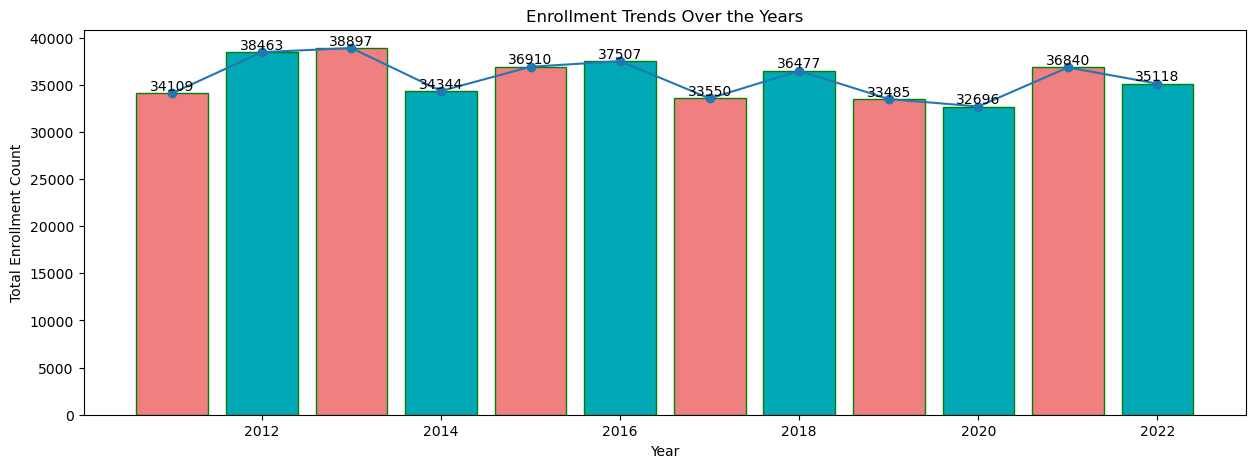

In [167]:
enrollment_trends = df.groupby('year')['enrollment_count'].sum().reset_index()
plt.figure(figsize=(15, 5))

plt.plot(enrollment_trends['year'], enrollment_trends['enrollment_count'], marker='o')
labels_trend = plt.bar(enrollment_trends['year'], enrollment_trends['enrollment_count'], color=['lightcoral', '#00a9b5'],  edgecolor='g')
plt.title('Enrollment Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Enrollment Count')

for bar in labels_trend:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, '%d' % int(height), ha='center', va='bottom')

plt.show()


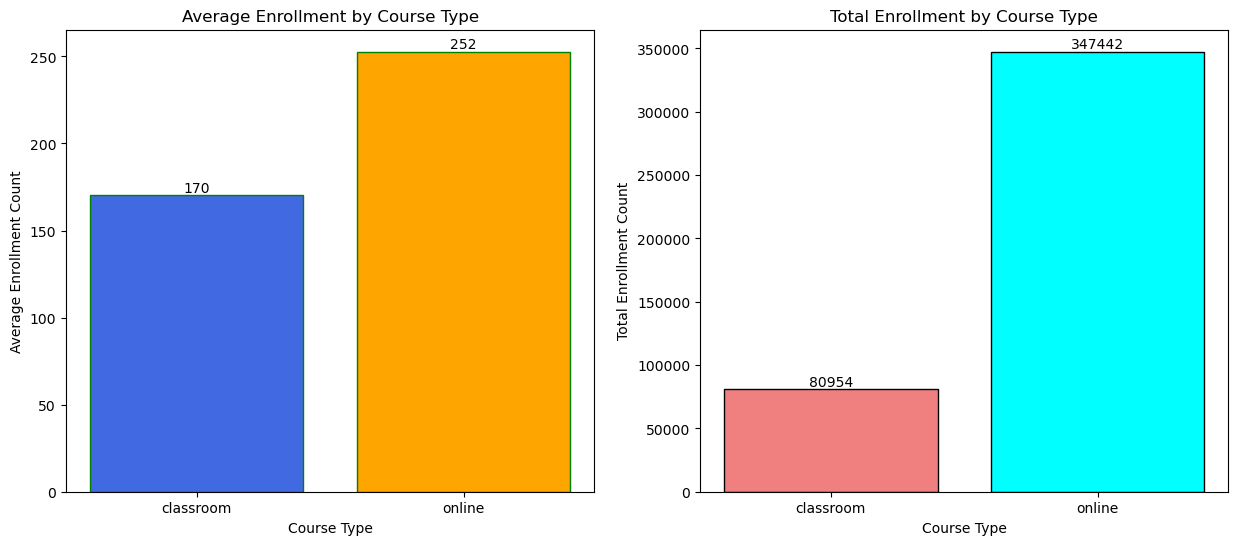

In [168]:
course_type_comparison_mean = df.groupby('course_type')['enrollment_count'].mean().reset_index()
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
mean_bars = plt.bar(course_type_comparison_mean['course_type'], course_type_comparison_mean['enrollment_count'], color=['royalblue', 'orange'],  edgecolor='g')
plt.title('Average Enrollment by Course Type')
plt.xlabel('Course Type')
plt.ylabel('Average Enrollment Count')

for bar in mean_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, '%d' % int(height), ha='center', va='bottom')


course_type_comparison_sum = df.groupby('course_type')['enrollment_count'].sum().reset_index()
plt.subplot(1,2,2)
sum_bars = plt.bar(course_type_comparison_sum['course_type'], course_type_comparison_sum['enrollment_count'], color=['lightcoral', 'cyan'], edgecolor='black')
plt.title('Total Enrollment by Course Type')
plt.xlabel('Course Type')
plt.ylabel('Total Enrollment Count')

for bar in sum_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, '%d' % int(height), ha='center', va='bottom')

plt.show()

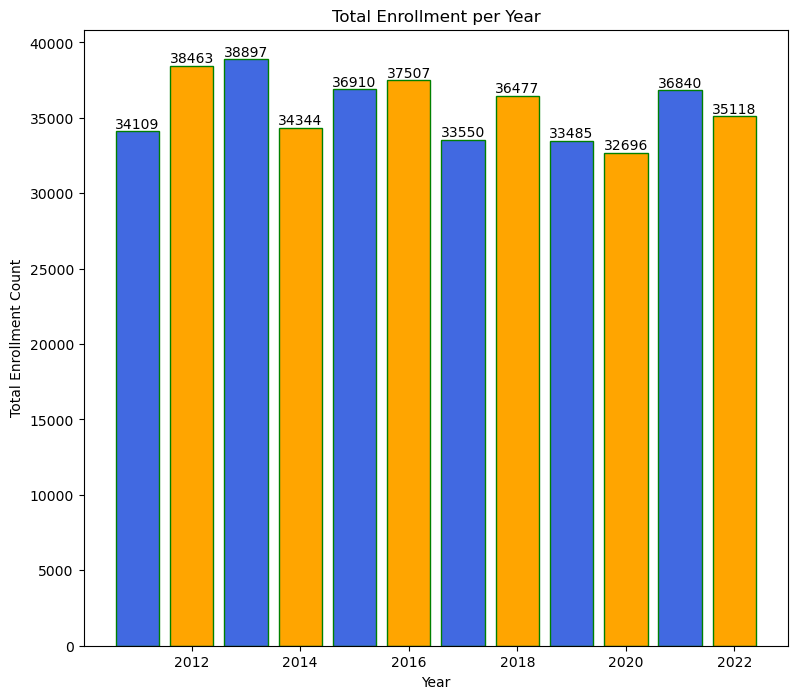

In [169]:
total_enrollment_per_year = df.groupby('year')['enrollment_count'].sum().reset_index()
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
labels_total = plt.bar(total_enrollment_per_year['year'], total_enrollment_per_year['enrollment_count'], color=['royalblue', 'orange'],  edgecolor='g')
plt.title('Total Enrollment per Year')
plt.xlabel('Year')
plt.ylabel('Total Enrollment Count')

for bar in labels_total:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, '%d' % int(height), ha='center', va='bottom')

In [170]:
df.groupby(['course_type', 'year']).agg({'enrollment_count': ['sum']})

enrollment_count
                              sum
course_type year                 
classroom   2011             6653
            2012             6089
            2013             7662
            2014             8591
            2015             7154
            2016             7188
            2017             5637
            2018             6263
            2019             7083
            2020             5836
            2021             6857
            2022             5941
online      2011            27456
            2012            32374
            2013            31235
            2014            25753
            2015            29756
            2016            30319
            2017            27913
            2018            30214
            2019            26402
            2020            26860
            2021            29983
            2022            29177

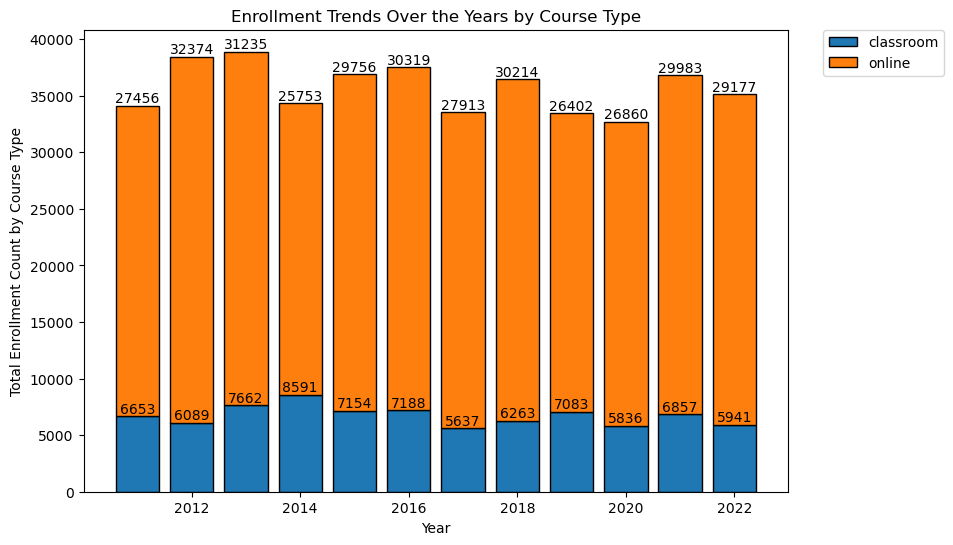

In [171]:
enrollment_trends = df.groupby(['year', 'course_type'])['enrollment_count'].sum().reset_index()
plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
course_types = enrollment_trends['course_type'].unique()
years = enrollment_trends['year'].unique()

bottom = np.zeros(len(years))

for i, course_type in enumerate(course_types):
    course_enrollment = enrollment_trends[enrollment_trends['course_type'] == course_type]
    bars = plt.bar(years, course_enrollment['enrollment_count'], label=course_type, bottom=bottom, edgecolor='black')
    for j, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, bottom[j] + height, '%d' % int(height), ha='center', va='bottom')
    bottom += course_enrollment['enrollment_count'].values

plt.title('Enrollment Trends Over the Years by Course Type')
plt.xlabel('Year')
plt.ylabel('Total Enrollment Count by Course Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

## The analysis indicates that online courses have higher enrollments compared to classroom courses.